# Data Visualization Exercises

## Data Preparation

#### Import Lib

In [55]:
#importing pandas and seaborn library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import folium

#### Set Style seaborn

In [56]:
#set style. Reference: https://python-graph-gallery.com/104-seaborn-themes
sns.set_theme(color_codes=True)
sns.set_style("dark")

#### Reading Dataset

In [57]:
#load dataset from seaborn library. Reference: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
tips = sns.load_dataset("tips")

#show dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
#show describe of dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [59]:
#show dataset info
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [60]:
#check null values in dataset
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Data Visualization

### Line Plot

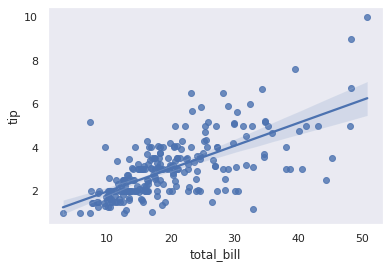

In [61]:
#data visualization using line plot
#regplot
ax = sns.regplot(x="total_bill", y="tip", data=tips)

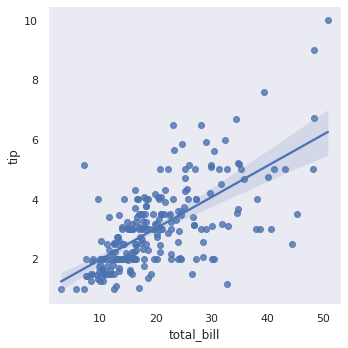

In [62]:
#data visualization using line plot
#lmplot
ax = sns.lmplot(x="total_bill", y="tip", data=tips)

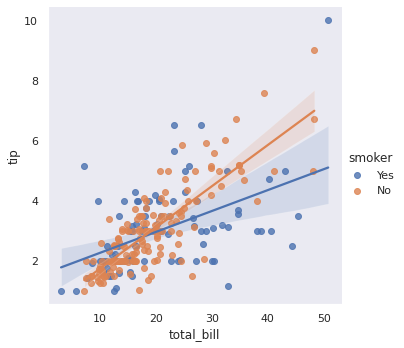

In [63]:
#data visualization using line plot
#lmplot
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

### Scatter Plot

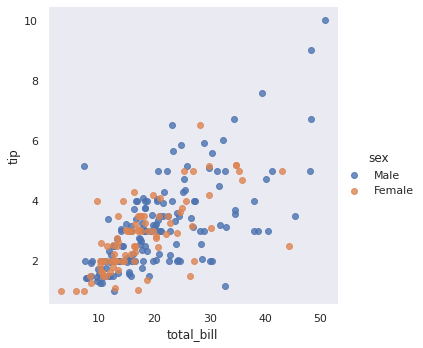

In [64]:
#data visualization using scatter plot
#lmplot
ax = sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False,  hue='sex')

### Bubble Chart

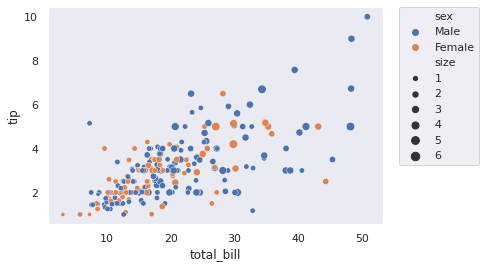

In [65]:
#data visualization using bubble chart
ax = sns.scatterplot(x="total_bill", y="tip", data=tips, size="size", hue='sex')  

#combine matplotlib with seaborn
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Bar Chart

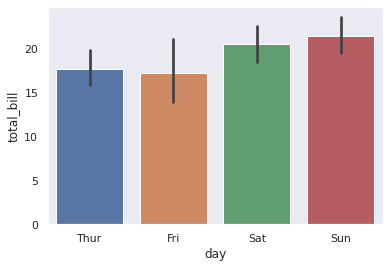

In [66]:
#data visualization using bar chart
ax = sns.barplot(x="day", y="total_bill", data=tips)

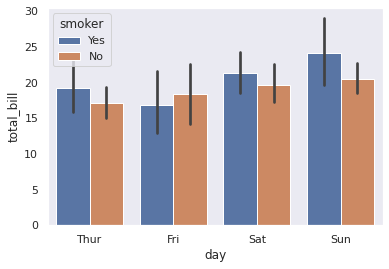

In [67]:
#data visualization using bar chart
ax = sns.barplot(x="day", y="total_bill", hue="smoker", data=tips)

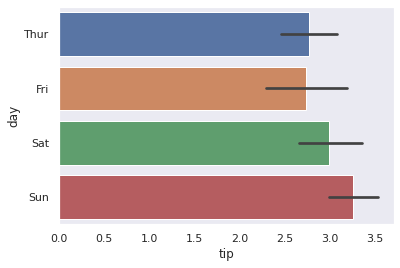

In [68]:
#data visualization using bar chart
ax = sns.barplot(x="tip", y="day", data=tips)

### Cat Plot

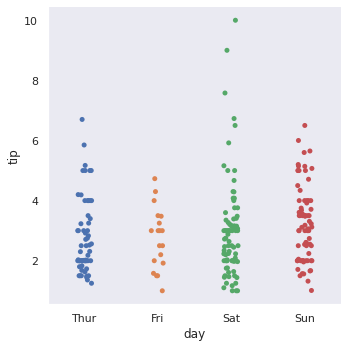

In [69]:
#data visualization using cat plot
g = sns.catplot(x="day", y="tip", data=tips)

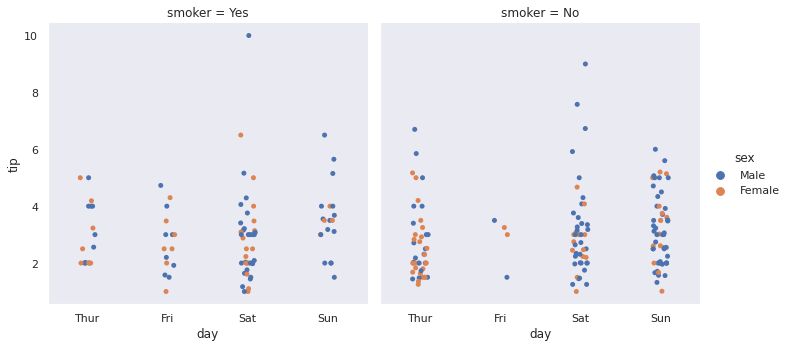

In [70]:
#data visualization using cat plot (multiple)
g = sns.catplot(x="day", y="tip", hue="sex", col='smoker', data=tips)

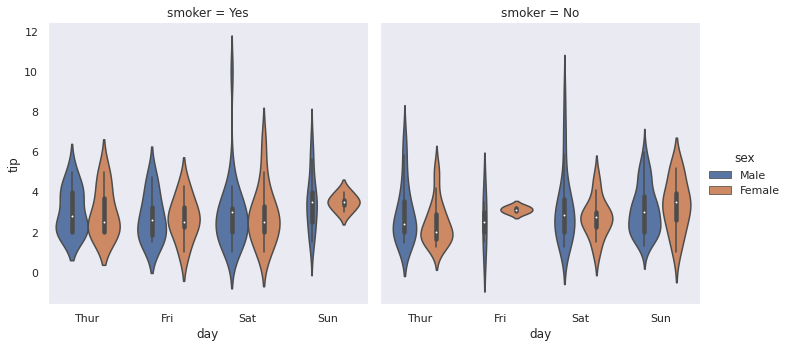

In [71]:
#add kind cat plot
#reference: https://seaborn.pydata.org/generated/seaborn.catplot.html
g = sns.catplot(x="day", y="tip", hue="sex", col='smoker', kind='violin', data=tips)

### Histogram

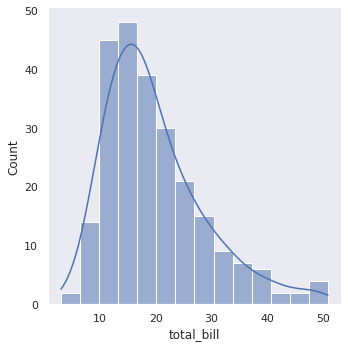

In [72]:
#data visualization using histogram
g = sns.displot(tips.total_bill, kde=True)

### Box Plot

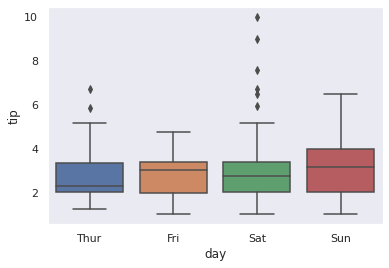

In [73]:
#data visualization using box plot
g = sns.boxplot(x="day", y="tip", data=tips)

### Scatter Plot Matrix

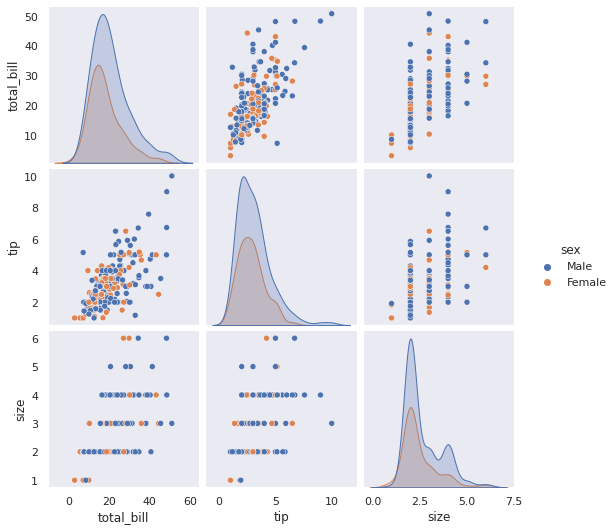

In [74]:
#data visualization using scatterplot matrix
g = sns.pairplot(tips, hue="sex")

### Correlation Heatmap

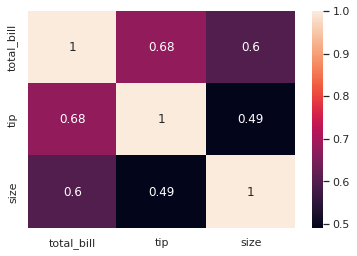

In [75]:
#data visualization using heatmap
sns.heatmap(tips.corr(), annot=True);

### Joint Plot

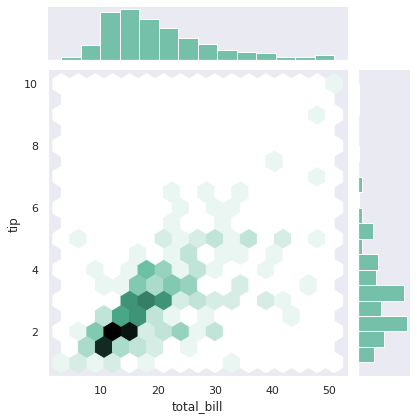

In [76]:
#data visualization using joint plot
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex", color="#4CB391")

### Folium
    #!pip install folium

In [79]:
# Source https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/#:~:text=Folium%20is%20a%20Python%20library,has%20the%20power%20of%20Leaflet.
m=folium.Map(location=[-6.556731, 106.725945], zoom_start=16)
m

In [80]:
#folium marker
m=folium.Map(location=[-6.556731, 106.725945],
             zoom_start=16)

tooltip = "Click me!"
folium.Marker( [-6.557373133349863, 106.7312903], popup="<i>FMIPA</i>", tooltip=tooltip).add_to(m)
folium.Marker( [-6.555666484674371, 106.72528758665811], popup="<i>Masjid Al-Hurriyah</i>", tooltip=tooltip).add_to(m)
m

In [83]:
#folium choropleth
#source: https://python-visualization.github.io/folium/quickstart.html
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [84]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [86]:
#folium map location visualization
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m